In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exercise = pd.read_csv("exercise.csv")
calories = pd.read_csv("calories.csv")

In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df = pd.merge(exercise,calories,on="User_ID")

In [11]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [14]:
df=df[df["Calories"]<300]     # For only calories less than 300
df=df.reset_index()           # Resetting the index (User_ID)
df["Intercept"] = 1

In [15]:
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


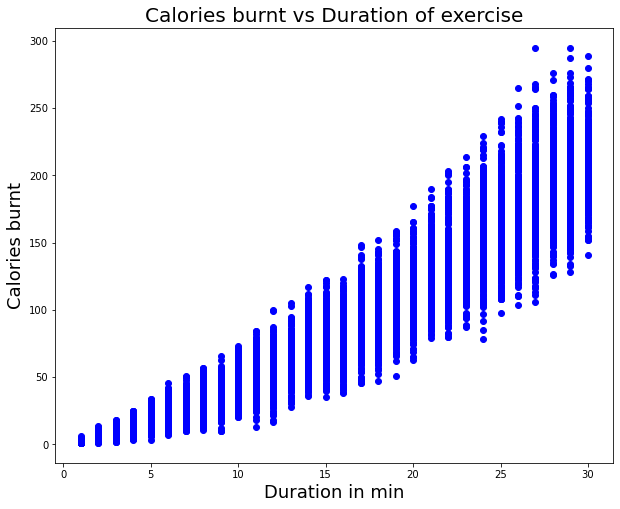

In [29]:
plt.figure(figsize=(10,8))
plt.xlabel("Duration in min",size=18)
plt.ylabel("Calories burnt",size=18)
plt.title("Calories burnt vs Duration of exercise",size=20)
plt.plot(df["Duration"],df["Calories"],'bo') # bo - blue circle markers

In [48]:
X=df[["Duration"]]
y=df["Calories"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
X.head()

,Duration
0,29.0
1,14.0
2,5.0
3,13.0
4,10.0


In [50]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
model.intercept_

-21.92561788503501

In [54]:
model.coef_

array([7.18699595])

In [55]:
y_pred=model.predict(X_test)

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

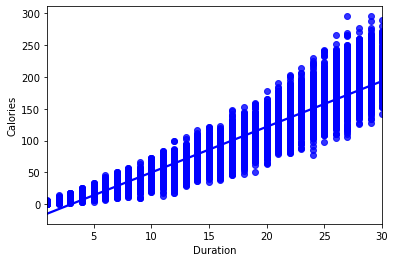

In [72]:
sns.regplot(x=df["Duration"],y=df["Calories"],data=df,color="blue")

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [74]:
MAE = mean_absolute_error(y_test,y_pred)

In [75]:
print(MAE)

13.555440891041167


In [76]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

18.25197761013601


In [77]:
print(model.predict([[15.5]]))    

[89.47281928]
